# **[13] 연속된 데이터는 어떻게 처리할 수 있을까요??**

## **🎯 학습 목표**
**1. 순환신경망을 설명할 수 있다.**  
**2. 순환신경망을 이용하여 자연어 처리 모델을 구현할 수 있다.**

---

### 1. 순환신경망이란?

순방향신경망(Feedforward Neural Network)은 데이터를 한 방향으로만 흐르게 하는 일반적인 신경망이에요.    
지금까지 배운 심층 신경망이나 합성곱 신경망이 여기에 해당되요.  
이 신경망들에서는 데이터가 입력층에서 시작하여 은닉층을 거쳐 출력층으로 나아가요.  
이 과정에서 데이터는 각 노드를 한 번씩만 지나게 되기 때문에 데이터의 순서를 고려할 수 없어요.  

하지만 순환신경망(RNN : Recurrent Neural Network)은 이전에 나온 데이터를 기억하고 활용할 수 있는 구조예요.  
예를 들어, 문장을 읽을 때 이전 단어들을 기억하며 다음 단어를 예측하는 것과 비슷한 원리예요.  
순환신경망은 은닉층의 결과가 다시 같은 은닉층의 입력으로 연결되어 있어 이전 정보를 유지하면서 데이터를 처리리해요.

아래의 그림을 보면 차이점을 명확하게 이해할 수 있어요.

<table>
<tr>
    <th><img src="" width="300"></th>
    <th><img src="" width="300"></th>
 </tr>
<tr>
    <th>(그림1) 순방향신경망</th>
    <th>(그림2) 순환신경망</th>
</tr>
</table>

### 2. 순환신경망이 필요한 이유는 무엇일까요?

그럼 이런 순환신경망이 필요한 이유는 무엇일까요??  
순환신경망은 시퀀스 데이터를 처리하는 데에 특히 유용해요.  
예를 들어 자연어 처리에서는 문장이나 문서의 문맥을 파악하거나, 음성 인식에서는 이전 대화를 고려하여 음성을 인식하는 데 활용될 수 있어요.  

**아래의 간단한 퀴즈를 통해 순환신경망이 필요한 이유를 알아봅시다.**

<table>
<tr>
    <th><img src="https://tmn-bucket-materials-all.s3.ap-northeast-2.amazonaws.com/image/ai/AI-13-1.PNG" width="300"></th>
 </tr>
<tr>
    <th>(그림3) 무작위로 배치된 카드 예측하기</th>
</tr>
</table>

**[문제1]** 그림3과 같이 숫자 카드가 무작위로 배치되어 있을 때 ?에 들어갈 숫자는 무엇인지 예상해볼까요?  
그렇게 예상한 이유도 같이 적어주세요!

<table>
<tr>
    <th><img src="https://tmn-bucket-materials-all.s3.ap-northeast-2.amazonaws.com/image/ai/AI-13-3.PNG" width="500"></th>
  </tr>
<tr>
    <th>(그림4) 순서대로 배치된 카드 예측하기</th>
</tr>
</table>

**[문제2]** 그림4와 같이 숫자 카드가 순서를 가지고 배치되어 있을 때 ?에 들어갈 숫자는 무엇인지 예상해볼까요?  
그렇게 예상한 이유도 같이 적어주세요!

카드들이 순서를 가졌을 때와 무작위로 배치되어 있을때의 결과가 같나요??  
아마도 다를거에요!
이처럼 순서를 가진 데이터에 순방향신경망을 사용하는 것은 (그림3)에서와 같이 순서를 무시한 채 데이터를 사용하는 것과 같아요.  
따라서 순서를 가진 데이터를 사용할 때에는 순환신경망을 사용해 순서가 예측에 반영될 수 있도록 해야 해요.

### 3. 순환신경망이 사용된 사례는 어떤 것이 있을까요?

순환신경망은 앞서 말한 것처럼 순서를 가진 데이터를 예측하는데에 탁월한 성능을 보여주고 있어요!


**[문제3]** 주위에서 순환신경망을 사용한 예시에는 어떤 것들이 있을까요?  
(힌트 : 순서가 있는 데이터를 사용한 경우를 생각해보아요!)

여러분들이 생각한 것 처럼 우리 주변의 여러가지 분야에서 순환신경망이 사용되고 있어요.  
여기서는 대표적인 예시 몇가지를 소개해드릴게요.  


최근 이슈가 되고 있는 chatGPT 역시도 순환신경망을 사용하고 있어요.  
chatGPT는 여러분이 입력한 텍스트를 기반으로 적절한 대답을 생성하는 모델이에요.  
chatGPT가 사용하는 데이터는 우리가 입력한 채팅이에요.  
채팅은 흔히 자연어라고 불리는 시퀀스 데이터의 일종이에요.  
따라서 이를 처리하기 위해 chatGPT에도 순환신경망의 구조가 포함되어 있답니다.

<table>
<tr>
    <th><img src="https://tmn-bucket-materials-all.s3.ap-northeast-2.amazonaws.com/image/ai/AI-13-4.PNG" width="700"></th>
  </tr>
<tr>
    <th>(그림5) chatGPT</th>
</tr>
</table>




### 4. 순환신경망의 구조를 알아봅시다

이제 순환신경망의 구조를 좀 더 자세히 알아보도록 할게요.  
순환신경망은 은닉 층의 출력이 다시 같은 은닉 층으로 반복해서 입력되는 구조로 이루어져 있어요.  
전체 순환신경망을 시간축을 중심으로 펼치는 아래와 같은 구조를 지녀요.

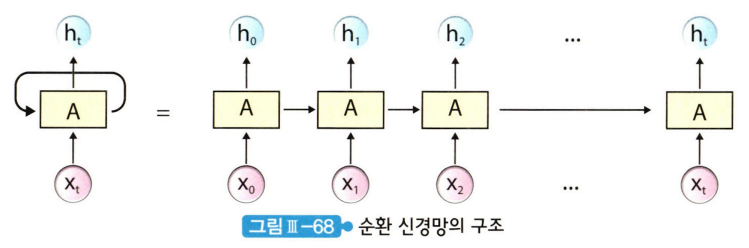

이처럼 순환신경망은 하나의 네트워크가 여러 개 복사된 형태로 구성되어 있고, 각 네트워크는 다음 단계로 정보를 넘겨 주고 있는 형태를 가지고 있어요.

순환신경망은 벡터 시퀀스를 입력받고, 이 시퀀스는 타임스텝을 따라서 반복되요.  
여기서 타임스텝은 데이터의 순서를 나타내는데, 첫번째 데이터의 타임 스텝은 0, 두번째 데이터의 타임 스텝은 1,... 과 같이 표현되요.
타임스텝 t에서의 입력과 출력은 $x_t$, $h_t$ 와 같이 표현해요.

순환신경망의 기본 구조를 응용하면 다양하게 사용할 수 있어요.  
사진을 입력으로 주었을 때 사진 속의 상황을 자연어로 설명해 주는 사례(one to many), 자연어로 자신의 상황을 설명하면 현재의 감정 상태를 분석해 주는 사례(many to one), 영어를 한국어로 번영하는 사례(many to many) 등 순환신경망은 매우 다양한 형태로 응용할 수 있어요.

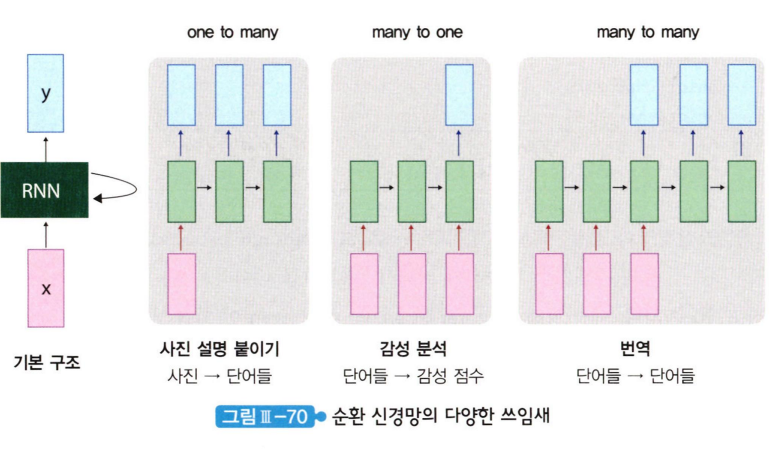

### 5. 순환신경망의 한계는 무엇일까요?

지금까지의 설명만으로는 순환신경망은 시퀀스데이터를 분석하는데에 결점이 없는 것처럼 보여요.  
하지만 순환신경망도 몇가지 한계점을 가지고 있답니다.

가장 먼저 순환신경망은 **장기 의존성 문제**를 가지고 있어요.  
장기 의존성 문제란 시퀀스데이터가 길어질 수록 예전의 데이터를 잃어버리는 것을 말해요.  
순환신경망은 데이터들이 순차적으로 입력되기 때문에 상대적으로 최근에 입력된 데이터가 예전에 입력된 데이터에 적은 영향을 끼쳐요.
그런데 시퀀스데이터가 너무 길어지게 되면 처음에 입력받았던 데이터가 영향을 거의 미치지 못하게 되는 것이죠.
이것을 보고 장기 의존성 문제 라고 해요.

다음은 순환신경망은 다른 신경망들에 비해 효율적으로 학습하기 어렵다는 단점을 가지고 있어요.  
순방향 신경망들은 데이터에 순서가 없기 때문에 한번에 여러개를 동시에 학습시킬 수 있어요.  
이를 데이터를 **병렬로 처리**한다고 해요.
하지만 순환신경망의 경우 데이터를 순서대로 학습시켜야 하기 때문에 병렬로 처리할 수 없어요.  
따라서 순환신경망은 다른 신경망들에 비해 효율적(한번에 여러개 씩) 학습 시키기 어려워요.

이 외에도 몇가지 문제점 들이 더 있는데, 이러한 문제들을 해결하고자 순환신경망을 발전시킨 여러 가지 신경망들이 개발되고 있어요. 장단기 메모리(LSTM)이나 GRU 등이 그것들 이랍니다.

### 6. 순환신경망을 활용한 금 시세 예측

https://predictor-ver1.tistory.com/5
